In [188]:
% run __initialize.ipynb

The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic


In [7]:
df = sns.load_dataset('titanic')

# Create Dataset Object

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,...,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,...,True,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,...,False,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,...,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,...,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [155]:
dep_var = 'survived'
id_var = ['pclass', 'sex']
indep_var = ['age', 'sibsp', 'parch', 'fare']

dummy_df = pd.get_dummies(df[['embarked','class','who']])
DF = ModelDF(df.merge(dummy_df, left_index=True, right_index=True), dep_var, id_var, indep_var + dummy_df.columns.tolist())
DF.X = DF.X.fillna(0)

In [156]:
DF.train_test_split()
DF.test.y.value_counts()

0    130
1     93
Name: survived, dtype: int64

In [229]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 50)
cl.fit(DF.train.X, DF.train.y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

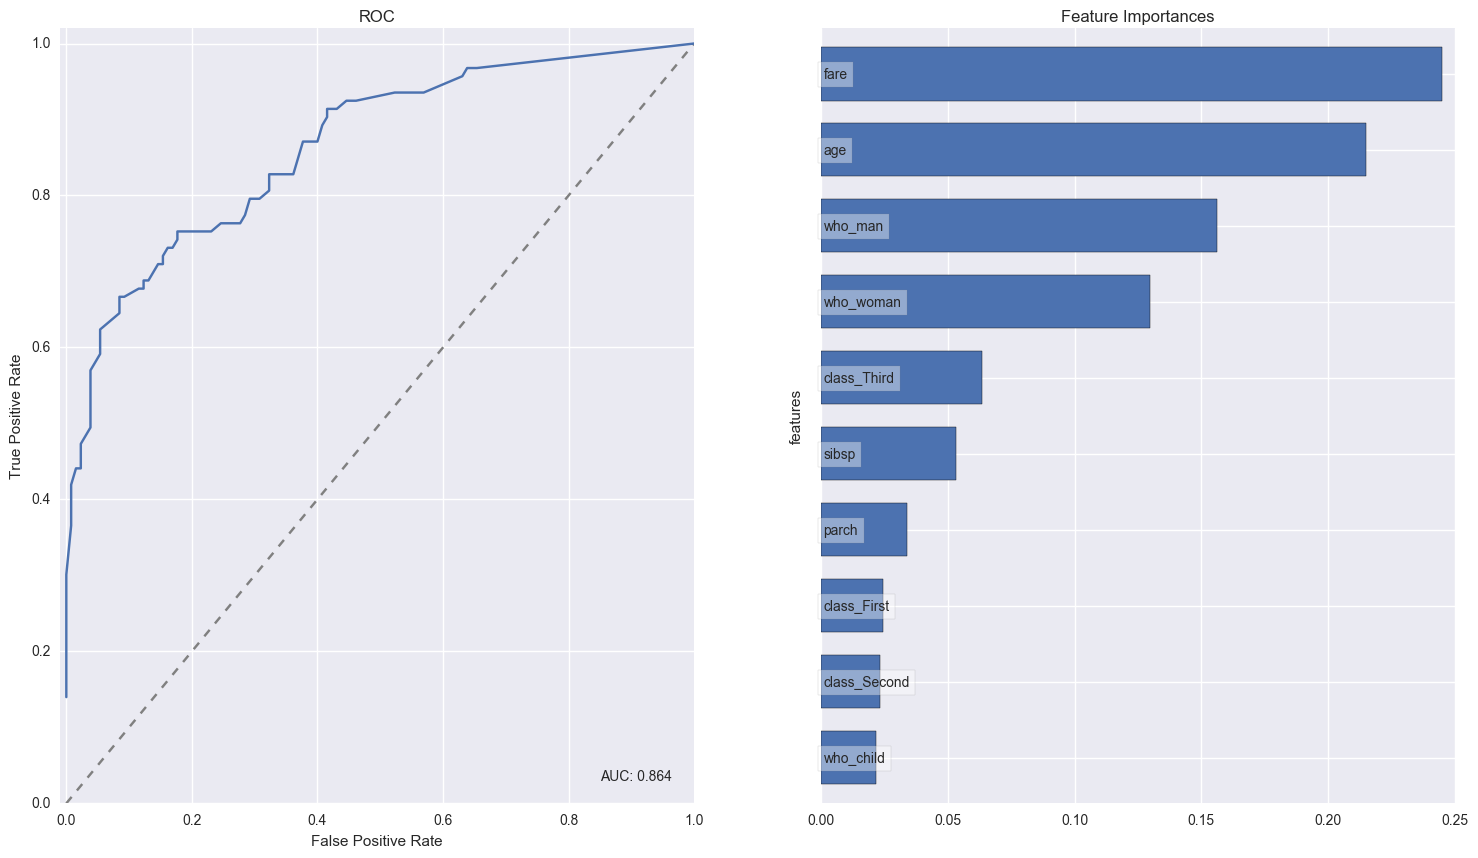

In [230]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(121)
DF.test.pred = cl.predict_proba(DF.test.X)[:,1]
ds_plotting.plot_roc(DF.test.y,DF.test.pred, ax=ax)

ax = fig.add_subplot(122)

df_imp = pd.DataFrame({'features': DF.train.X.columns,
                      'importances': cl.feature_importances_})
ds_plotting.plot_importances(df_imp, ax = ax)

In [154]:
DF.X

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
5,0.0,0,0,8.4583
6,54.0,0,0,51.8625
7,2.0,3,1,21.0750
8,27.0,0,2,11.1333
9,14.0,1,0,30.0708


In [210]:
df_err_sub

,importances
features,
fare,0.226613
embarked_C,0.011633
embarked_Q,0.006389
embarked_S,0.018358
class_First,0.027755
class_Second,0.018077
class_Third,0.048521
who_child,0.009622
who_man,0.236228


In [212]:
df_err_sub

,importances
features,
fare,0.030763
embarked_C,0.007071
embarked_Q,0.004928
embarked_S,0.007943
class_First,0.026724
class_Second,0.016743
class_Third,0.032040
who_child,0.011607
who_man,0.104340


In [233]:
df_errors

,features,importances
0,age,0.032501
1,sibsp,0.024609
2,parch,0.011613
3,fare,0.044687
4,embarked_C,0.011964
5,embarked_Q,0.008947
6,embarked_S,0.010005
7,class_First,0.017935
8,class_Second,0.023435
9,class_Third,0.047951


In [243]:
df_errors.set_index('features')

,importances
features,
age,0.032501
sibsp,0.024609
parch,0.011613
fare,0.044687
embarked_C,0.011964
embarked_Q,0.008947
embarked_S,0.010005
class_First,0.017935
class_Second,0.023435


In [248]:
df_imp_sub.index,df_errors.set_index('features').ix['who_child']

(Index([u'who_child', u'class_Second', u'class_First', u'parch', u'sibsp',
        u'class_Third', u'who_woman', u'who_man', u'age', u'fare'],
       dtype='object', name=u'features'), importances    0.025773
 Name: who_child, dtype: float64)

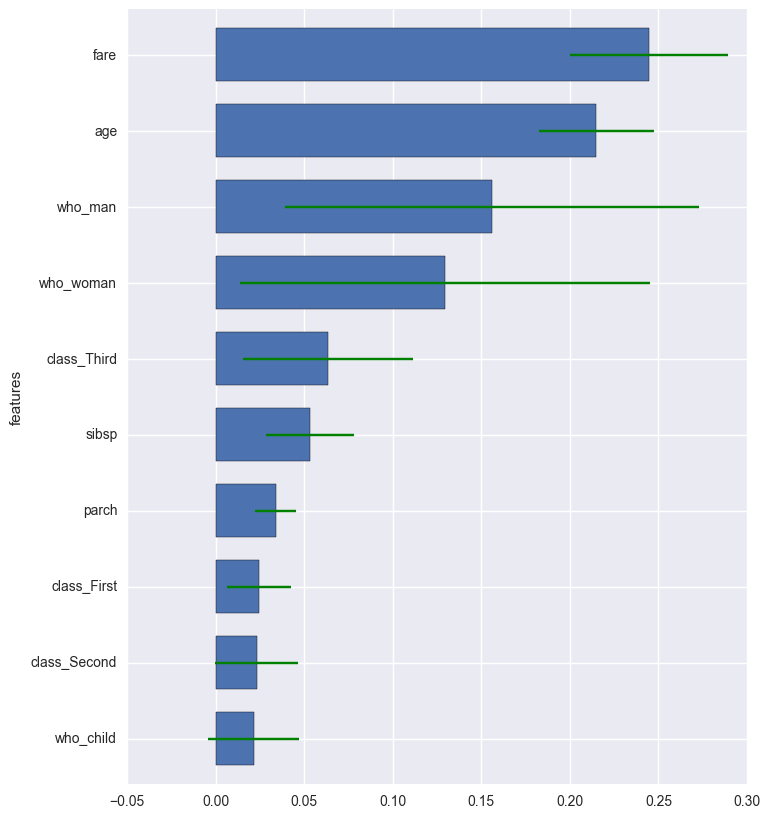

In [249]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

df_imp = pd.DataFrame({'features': DF.train.X.columns,
                      'importances': cl.feature_importances_})
errors = np.std([tree.feature_importances_ for tree in cl.estimators_],axis=0)
df_errors = pd.DataFrame({'features': DF.train.X.columns,
                          'importances': errors})
df_imp_sub = df_imp.set_index('features').sort_values('importances').tail(n_features)
df_err_sub = df_errors.set_index('features').ix[df_imp_sub.index]
ax = df_imp_sub.plot(kind='barh', width = .7, legend=False,ax=ax, xerr=df_err_sub, ecolor='g')
# ds_plotting.plot_importances(df_imp, ax = ax, yerr=df_errors)
# ax.errorbar(ecolor='g')

In [228]:
df_err_sub

,importances
features,
fare,0.030763
embarked_C,0.007071
embarked_Q,0.004928
embarked_S,0.007943
class_First,0.026724
class_Second,0.016743
class_Third,0.032040
who_child,0.011607
who_man,0.104340


In [118]:
% run __initialize.ipynb
# dummy variables
dummy = DummyVariable()
s = pd.Series(['hello']*5 + ['yo'] + ['world']*3 + ['test']*4 + ['big'] + ['dsfsd sf- sdf- dsf_f ds'] + ['thank you']*4, name = 'hamburger')
dummy.map_dummy(s, 5)

# date features
rng = pd.date_range('1/1/2011', periods=72, freq='H')
date_feat = DateFeatures()
date_feat.create('birthdays')

# agg features on numeric
agg_feat_gen = AggFeatures()
agged_features = []
cols_to_agg_on = {'age':'of_age', 'fare':'of_fare'}
for k,v in cols_to_agg_on.iteritems():
    agged_features.extend(agg_feat_gen.gen_features(k,v))
agged_features_str = ',\n'.join(agged_features)
print agged_features_str

The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic
MIN(fare) AS MIN_of_fare,
MAX(fare) AS MAX_of_fare,
AVG(fare) AS AVG_of_fare,
SUM(fare) AS SUM_of_fare,
PERCENTILE(CAST(fare AS BIGINT) AS MEDIAN_of_fare,
MIN(age) AS MIN_of_age,
MAX(age) AS MAX_of_age,
AVG(age) AS AVG_of_age,
SUM(age) AS SUM_of_age,
PERCENTILE(CAST(age AS BIGINT) AS MEDIAN_of_age


In [59]:
%%readsql
SELECT 1, --hello world
       2, -- i am here
       3

,?column?,?column?,?column?
0,1,2,3


In [2]:

value_counts_per = (s.value_counts()/s.value_counts().sum())[0:4].sort_index()
value_counts_per

NameError: name 's' is not defined

# Python + Powerpoint

In [255]:
import ds_powerpoint
from pptx import Presentation

In [300]:
my_template = 'ds_powerpoint/template.pptx'
template_explained = 'ds_powerpoint/template_explained.pptx'
sample_image = 'ds_powerpoint/sample_image.png'
my_ppt = 'ds_powerpoint/my_presentation.pptx'

ds_powerpoint.analyze_ppt(my_template, template_explained)

0 Title 1
1 Subtitle 2
0 Title 1
1 Content Placeholder 2
0 Title 1
1 Text Placeholder 2
0 Title 1
1 Content Placeholder 2
2 Content Placeholder 3
0 Title 1
1 Text Placeholder 2
2 Content Placeholder 3
3 Text Placeholder 4
4 Content Placeholder 5
0 Title 1
No Title for Layout 6
0 Title 1
2 Text Placeholder 2
13 Picture Placeholder 3
0 Title 1
1 Content Placeholder 2
2 Text Placeholder 3
0 Title 1
1 Picture Placeholder 2
2 Text Placeholder 3
0 Title 1
1 Vertical Text Placeholder 2
0 Vertical Title 1
1 Vertical Text Placeholder 2


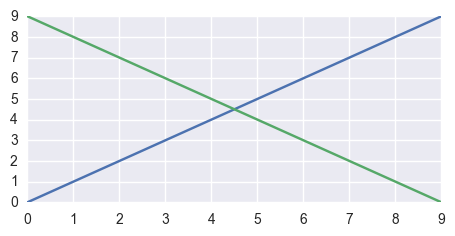

In [338]:
# create sample image
from matplotlib import pyplot as plt
w,h=5.34,6.4
w,h=5.34,2.4
plt.figure(figsize=(w,h))
plt.plot(range(10), range(10))
plt.plot(range(10), range(10)[::-1])
plt.savefig(sample_image)

## Insert image into placeholder position

In [349]:
from pptx.util import Inches

# read in template slide
prs = Presentation(my_template)
title_slide_layout = prs.slide_layouts[7]
slide = prs.slides.add_slide(title_slide_layout)

# content
title = 'Hello, this is a title'
body = ['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium', 'Totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto']
image_location = 'ds_powerpoint/sample_image.png'

# identify relevant slide objects
ppx_title = slide.shapes.title
ppx_body = slide.placeholders[2]
ppx_content = slide.placeholders[13]
print 'Image size is: {}'

# update slide
ppx_title.text = title
tf = ppx_body.text_frame
for b in body:
    tf.add_paragraph().text = b
pic = ppx_content.insert_picture(image_location)

# save slide to disk
prs.save(my_ppt)

Image size is: {}


## Drop image in specific location

In [350]:
from pptx.util import Inches

# create new slide
title_slide_layout = prs.slide_layouts[7]
slide = prs.slides.add_slide(title_slide_layout)

# content
title = 'Hello, this is a title'
body = ['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium', 'Totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto']
image_location = 'ds_powerpoint/sample_image.png'

# identify relevant slide objects
ppx_title = slide.shapes.title
ppx_body = slide.placeholders[2]
print 'Image size is: {}'

# update slide
ppx_title.text = title
tf = ppx_body.text_frame
for b in body:
    tf.add_paragraph().text = b
    
# position image
top, left = Inches(1),Inches(3)
slide.shapes.add_picture(image_location, left, top)
# pic = ppx_content.insert_picture(image_location)

# save slide to disk
prs.save(my_ppt)

Image size is: {}
